**Important: This notebook will only work with fastai-0.7.x. Do not try to run any fastai-1.x code from this path in the repository because it will load fastai-0.7.x**

In [95]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.nlp import *
from sklearn.linear_model import LogisticRegression

## IMDB dataset and the sentiment classification task

The [large movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/) contains a collection of 50,000 reviews from IMDB. The dataset contains an even number of positive and negative reviews. The authors considered only highly polarized reviews. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. Neutral reviews are not included in the dataset. The dataset is divided into training and test sets. The training set is the same 25,000 labeled reviews.

The **sentiment classification task** consists of predicting the polarity (positive or negative) of a given text.

To get the dataset, in your terminal run the following commands:

`wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz`

`gunzip aclImdb_v1.tar.gz`

`tar -xvf aclImdb_v1.tar`

### Tokenizing and term document matrix creation

In [96]:
PATH='data/aclImdb/'
names = ['neg','pos']

In [97]:
%ls {PATH}

imdbEr.txt  imdb.vocab  README  test/  train/


In [98]:
%ls {PATH}train

labeledBow.feat  pos/    unsupBow.feat  urls_pos.txt
neg/             unsup/  urls_neg.txt   urls_unsup.txt


In [99]:
%ls {PATH}train/pos | head

0_9.txt
10000_8.txt
10001_10.txt
10002_7.txt
10003_8.txt
10004_8.txt
10005_7.txt
10006_7.txt
10007_7.txt
10008_7.txt
ls: write error: Broken pipe


In [100]:
?? texts_labels_from_folders

In [101]:
import os
def get_text_label(path, classes):
    text, labels =[], []
    for i, class_ in enumerate(classes):
        for f in os.listdir(path+'/'+class_):
            text.append(open(path+'/'+class_+'/'+f,'r').read())
            labels.append(i)
    return text, np.array(labels)
    

In [102]:
trn, trn_y =get_text_label(f'{PATH}train',names)
val,val_y = get_text_label(f'{PATH}test',names)

In [103]:
trn[0]

'The movie starts with a pair of campers, a man and a woman presumably together, hiking alone in the vast wilderness. Sure enough the man hears something and it pangs him so much he goes to investigate it. Our killer greets him with a stab to the stomach. He then chases the girl and slashes her throat. The camera during the opening scene is from the point of view as the killer.<br /><br />We next meet our four main characters, two couples, one in which is on the rocks. The men joke about how the woman would never be able to handle camping alone at a double date, sparking the token blonde\'s ambition to leave a week early. Unexpectedly, the men leave the same day and their car breaks down.. They end up arriving in the evening. When the men arrive, they are warned about people disappearing in the forest by a crazy Ralph doppleganger. They ignore the warning and venture into the blackening night and an eighties song plays in the background with lyrics about being murdered in the dark fore

In [104]:
trn_y[0]

0

Here is the text of the first review

[`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) converts a collection of text documents to a matrix of token counts (part of `sklearn.feature_extraction.text`).

In [107]:
?? CountVectorizer

In [108]:
veczr = CountVectorizer(tokenizer=tokenize)

`fit_transform(trn)` finds the vocabulary in the training set. It also transforms the training set into a term-document matrix. Since we have to apply the *same transformation* to your validation set, the second line uses just the method `transform(val)`. `trn_term_doc` and `val_term_doc` are sparse matrices. `trn_term_doc[i]` represents training document i and it contains a count of words for each document for each word in the vocabulary.

In [109]:
trn_term_doc = veczr.fit_transform(trn)
val_term_doc = veczr.transform(val)

25000 documents with 75132 tokens one hot encoded

In [110]:
trn_term_doc

<25000x75132 sparse matrix of type '<class 'numpy.int64'>'
	with 3749745 stored elements in Compressed Sparse Row format>

In [111]:
print(trn_term_doc)

  (0, 5831)	1
  (0, 60752)	1
  (0, 2419)	1
  (0, 14)	1
  (0, 13466)	1
  (0, 41863)	1
  (0, 42662)	1
  (0, 46753)	1
  (0, 65449)	1
  (0, 32699)	1
  (0, 10333)	1
  (0, 32391)	2
  (0, 1038)	1
  (0, 5221)	1
  (0, 42784)	1
  (0, 848)	1
  (0, 67253)	1
  (0, 18672)	1
  (0, 64840)	1
  (0, 73263)	1
  (0, 66640)	1
  (0, 64229)	1
  (0, 69244)	1
  (0, 50509)	1
  (0, 59140)	1
  :	:
  (24999, 66596)	1
  (24999, 57049)	5
  (24999, 8)	8
  (24999, 4721)	1
  (24999, 6304)	1
  (24999, 1230)	2
  (24999, 46986)	2
  (24999, 16)	2
  (24999, 4431)	3
  (24999, 26188)	1
  (24999, 34616)	9
  (24999, 67252)	8
  (24999, 44303)	2
  (24999, 31023)	1
  (24999, 34716)	7
  (24999, 61750)	1
  (24999, 15)	14
  (24999, 33036)	3
  (24999, 3219)	11
  (24999, 13)	22
  (24999, 46749)	6
  (24999, 1050)	12
  (24999, 73488)	2
  (24999, 44202)	2
  (24999, 66458)	11


In [112]:
trn_term_doc[0]

<1x75132 sparse matrix of type '<class 'numpy.int64'>'
	with 379 stored elements in Compressed Sparse Row format>

In [113]:
print(trn_term_doc[0])

  (0, 5831)	1
  (0, 60752)	1
  (0, 2419)	1
  (0, 14)	1
  (0, 13466)	1
  (0, 41863)	1
  (0, 42662)	1
  (0, 46753)	1
  (0, 65449)	1
  (0, 32699)	1
  (0, 10333)	1
  (0, 32391)	2
  (0, 1038)	1
  (0, 5221)	1
  (0, 42784)	1
  (0, 848)	1
  (0, 67253)	1
  (0, 18672)	1
  (0, 64840)	1
  (0, 73263)	1
  (0, 66640)	1
  (0, 64229)	1
  (0, 69244)	1
  (0, 50509)	1
  (0, 59140)	1
  :	:
  (0, 34716)	9
  (0, 61750)	4
  (0, 30310)	1
  (0, 21962)	1
  (0, 64703)	1
  (0, 15)	50
  (0, 73207)	1
  (0, 71016)	1
  (0, 33036)	13
  (0, 2737)	2
  (0, 30979)	1
  (0, 67302)	2
  (0, 51642)	1
  (0, 73621)	5
  (0, 3219)	23
  (0, 40639)	3
  (0, 13)	27
  (0, 10302)	1
  (0, 46749)	12
  (0, 48148)	1
  (0, 1050)	17
  (0, 73488)	8
  (0, 63029)	1
  (0, 44202)	3
  (0, 66458)	77


In [114]:
vocab = veczr.get_feature_names(); vocab[5000:5005]

['aussie', 'aussies', 'austen', 'austeniana', 'austens']

In [115]:
veczr.get_feature_names()[66458]

'the'

In [116]:
veczr.get_feature_names()[63029]

'starts'

In [117]:
veczr.get_feature_names()[10302]

'campers'

In [118]:
w0 = set([o.lower() for o in trn[0].split(' ')]); w0

{'"daddy\'s',
 '"skip"',
 '(maybe',
 '/>-',
 '/><br',
 '/>for',
 '/>freaked',
 '/>in',
 '/>overall',
 '/>the',
 '/>we',
 '6',
 '<br',
 'a',
 'able',
 'about',
 'acting.',
 'after',
 'afterwards,',
 'agree',
 'alan',
 'all',
 'allergic!',
 'alone',
 'also',
 'ambition',
 'an',
 'and',
 'angles',
 'another',
 'apparent',
 'appear',
 'appears',
 'are',
 "aren't",
 'arrive,',
 'arrives.<br',
 'arriving',
 'as',
 'asks',
 'at',
 'atop',
 'away;',
 'back',
 'background',
 'bad',
 'bannacheck',
 'be',
 'beautiful',
 'because',
 'before',
 'being',
 'blackening',
 'blindly',
 'blonde',
 "blonde's",
 'blonde.',
 'blood',
 'breaks',
 'brief',
 'burning',
 'but',
 'by',
 'california?)',
 'camera',
 'campers,',
 'campground',
 'camping',
 'campsite,',
 'campsite.',
 "can't",
 'car',
 'carrying',
 'caught',
 'causes',
 'characters,',
 'chases',
 'cheating.',
 'children',
 "children's",
 'children,',
 'children.<br',
 'clearly',
 'clone,',
 'come',
 'couples,',
 'course.',
 'crazy',
 'dad',
 'dark',

In [119]:
trn_term_doc[0]

<1x75132 sparse matrix of type '<class 'numpy.int64'>'
	with 379 stored elements in Compressed Sparse Row format>

In [120]:
len(w0)

403

In [121]:
veczr.vocabulary_['absurd']

1297

In [122]:
trn_term_doc[0,1297]

0

In [123]:
veczr.vocabulary_

{'the': 66458,
 'movie': 44202,
 'starts': 63029,
 'with': 73488,
 'a': 1050,
 'pair': 48148,
 'of': 46749,
 'campers': 10302,
 ',': 13,
 'man': 40639,
 'and': 3219,
 'woman': 73621,
 'presumably': 51642,
 'together': 67302,
 'hiking': 30979,
 'alone': 2737,
 'in': 33036,
 'vast': 71016,
 'wilderness': 73207,
 '.': 15,
 'sure': 64703,
 'enough': 21962,
 'hears': 30310,
 'something': 61750,
 'it': 34716,
 'pangs': 48300,
 'him': 31023,
 'so': 61492,
 'much': 44303,
 'he': 30228,
 'goes': 27958,
 'to': 67252,
 'investigate': 34405,
 'our': 47514,
 'killer': 36603,
 'greets': 28621,
 'stab': 62777,
 'stomach': 63456,
 'then': 66511,
 'chases': 11702,
 'girl': 27577,
 'slashes': 60864,
 'her': 30664,
 'throat': 66806,
 'camera': 10254,
 'during': 20526,
 'opening': 47106,
 'scene': 57971,
 'is': 34616,
 'from': 26188,
 'point': 50659,
 'view': 71467,
 'as': 4431,
 '<': 1039,
 'br': 8696,
 '/': 16,
 '>': 1041,
 'we': 72506,
 'next': 45575,
 'meet': 42027,
 'four': 25741,
 'main': 40413,
 'c

In [124]:
veczr.vocabulary_['campers']

10302

In [125]:
trn_term_doc[0, 10302]

1

In [126]:
trn_term_doc[0,5000]

0

## Naive Bayes

We define the **log-count ratio** $r$ for each word $f$:

$r = \log \frac{\text{ratio of feature $f$ in positive documents}}{\text{ratio of feature $f$ in negative documents}}$

where ratio of feature $f$ in positive documents is the number of times a positive document has a feature divided by the number of positive documents.

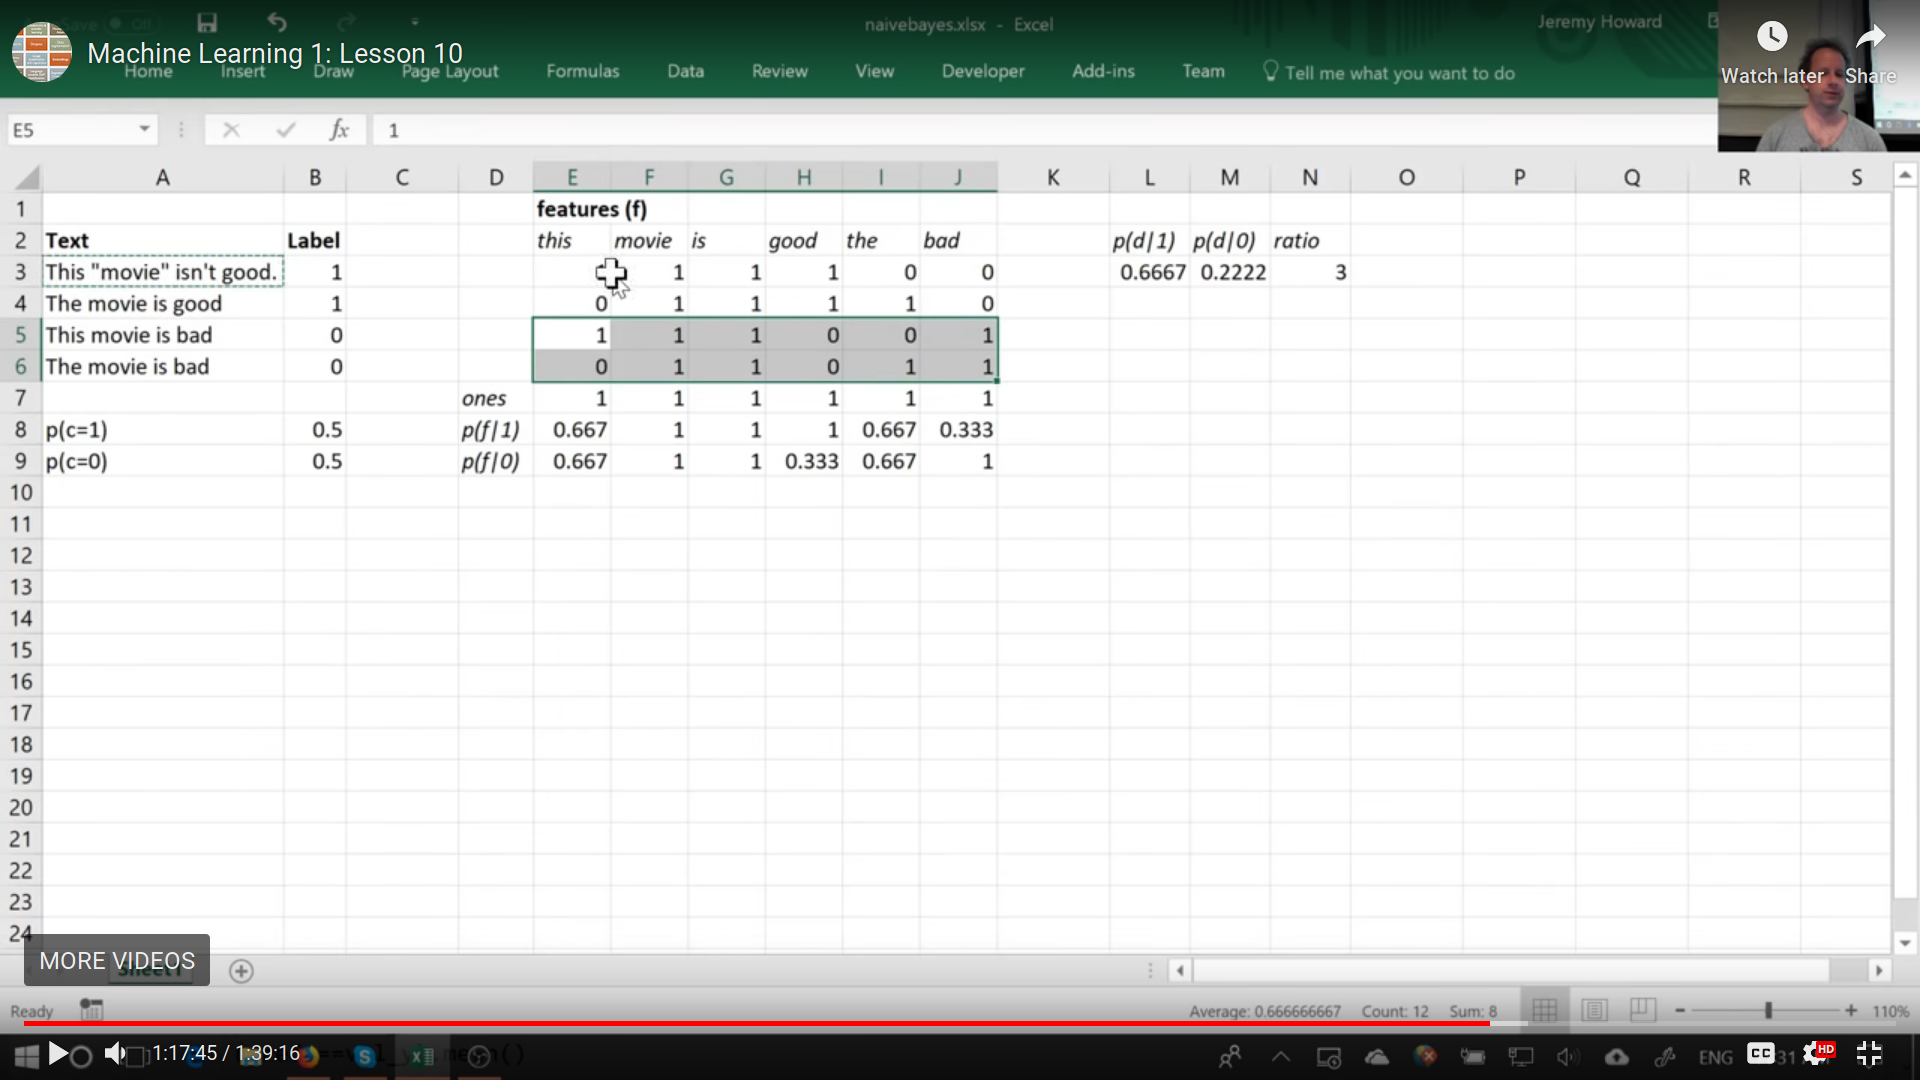

In [127]:
from IPython.display import Image
Image(filename = "/home/eve/Pictures/pic.png", width=1000, height=150)

Include a row of all ones to make sure probability isnt 0


Ive never seen a positive review with the word "hell" so p(hell|positive) = 0 but this isnt true because it is possible to get a positive review with the word hell. 

So include the row of ones to counteract this. Apply it to both classes so effect cancels out and nothing ever has a probability of 0. 

p(f|c) = p(feature|class)


Want to find:

p(class=1|document) = 

p(document|class=1) p(class=1)

div

p(d)

Really want to know whether its more likely to be class 1 or 0:

p(c=1|d)

div

p(c=0|d)

If this > 1 then more likely to be 1 and vice versa


this is equal to:

(p(document|class=1) p(class=1)

div

p(d)) 

div

(p(document|class=0) p(class=0)

div

p(d)
)

p(d) cancels, left with 

p(d|c=1)p(c=1)

div

p(d|c=0)p(c=0)


p(d|1) = 0.667 * 1 * 1 * 1

p(the features in the document| c=1) 

p('this movie is good'|1) =

p('this' |c=1) * p(movie|1) * p(is|1)* p(good|1) = 0.667

p('this movie is good'|0) =

p('this' |c=0) * p(movie|0) * p(is|0)* p(good|0) = 0.22


overall = 0.667*0.5  / 0.22 * 0.5 = 3 -> more likely to be class = 1




In [128]:
def pr(class_):
    p = x[y==class_].sum(0)
    print(p)
#     + 1 so that nothing has prob of 0
    return (p+1) / ((y==class_).sum()+1)

In [129]:
trn_y==1

array([False, False, False, ...,  True,  True,  True])

In [130]:
x=trn_term_doc
y=trn_y

r = np.log(pr(1)/pr(0))
b = np.log((y==1).mean() / (y==0).mean())

[[    1     0 11819 ...     1     1     0]]
[[    0     1 12741 ...     0     1     7]]


In [131]:
pr(1)

[[    1     0 11819 ...     1     1     0]]


matrix([[0.00016, 0.00008, 0.94552, ..., 0.00016, 0.00016, 0.00008]])

In [132]:
pr(0)

[[    0     1 12741 ...     0     1     7]]


matrix([[0.00008, 0.00016, 1.01928, ..., 0.00008, 0.00016, 0.00064]])

In [133]:
(y==1).mean(), (y==0).mean()

(0.5, 0.5)

In [134]:
r,b

(matrix([[ 0.69315, -0.69315, -0.07511, ...,  0.69315,  0.     , -2.07944]]),
 0.0)

Here is the formula for Naive Bayes.

In [135]:
pre_preds = val_term_doc @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.81656

...and binarized Naive Bayes.

In [136]:
x=trn_term_doc.sign()
r = np.log(pr(1)/pr(0))

pre_preds = val_term_doc.sign() @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

[[   1    0 4180 ...    1    1    0]]
[[   0    1 4415 ...    0    1    1]]


0.83016

### Logistic regression

Here is how we can fit logistic regression where the features are the unigrams.

In [137]:
m = LogisticRegression(C=1e8, dual=True)
m.fit(x, y)
preds = m.predict(val_term_doc)
(preds==val_y).mean()

/home/eve/anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/eve/anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.833

<span style="color:red">***The count of occurences usually isnt important so take .sign() which will just return 1 if >0 and 0 otherwise***</span>


In [138]:
m = LogisticRegression(C=1e8, dual=True)
m.fit(trn_term_doc.sign(), y)
preds = m.predict(val_term_doc.sign())
(preds==val_y).mean()

/home/eve/anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.85508

...and the regularized version

In [139]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(x, y)
preds = m.predict(val_term_doc)
(preds==val_y).mean()

0.84872

In [140]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(trn_term_doc.sign(), y)
preds = m.predict(val_term_doc.sign())
(preds==val_y).mean()

0.88404

### Trigram with NB features

Our next model is a version of logistic regression with Naive Bayes features described [here](https://www.aclweb.org/anthology/P12-2018). For every document we compute binarized features as described above, but this time we use bigrams and trigrams too. Each feature is a log-count ratio. A logistic regression model is then trained to predict sentiment.

 <span style="color:red">***max_features=800,000 will sort the unigrams, bigrams and trigrams by occurences and keep the 800,000 most common***</span>


In [167]:
??CountVectorizer

In [141]:
veczr =  CountVectorizer(ngram_range=(1,3), tokenizer=tokenize, max_features=800000)
trn_term_doc = veczr.fit_transform(trn)
val_term_doc = veczr.transform(val)

In [160]:
veczr.get_feature_names()[:10]

['!',
 '! !',
 '! ! !',
 '! ! "',
 "! ! '",
 '! ! (',
 '! ! )',
 '! ! *',
 '! ! -',
 '! ! .']

In [169]:
trn_term_doc.shape

(25000, 800000)

In [170]:
vocab = veczr.get_feature_names()

In [171]:
vocab[200000:200005]

['by vast', 'by vengeance', 'by vengeance .', 'by vera', 'by vera miles']

In [177]:
# y=trn_y
# x=trn_term_doc.sign()
# val_x = val_term_doc.sign()

In [178]:
r = np.log(pr(1) / pr(0))
b = np.log((trn_y==1).mean() / (trn_y==0).mean())

[[4180  726  415 ...    2    0    0]]
[[4415  853  532 ...    0    1    1]]


Here we fit regularized logistic regression where the features are the trigrams.

In [176]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(trn_term_doc.sign(), trn_y);

preds = m.predict(val_term_doc.sign())
(preds.T==val_y).mean()

/home/eve/anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.905

Here is the $\text{log-count ratio}$ `r`.  

In [179]:
r.shape, r

((1, 800000),
 matrix([[-0.05468, -0.161  , -0.24784, ...,  1.09861, -0.69315, -0.69315]]))

In [180]:
np.exp(r)

matrix([[0.94678, 0.85129, 0.78049, ..., 3.     , 0.5    , 0.5    ]])

Here we fit regularized logistic regression where the features are the trigrams' log-count ratios.

In [185]:
x._nb = trn_term_doc.sign().multiply(r)
m = LogisticRegression(dual=True, C=0.1)
m.fit(x_nb, trn_y);

val_x_nb = val_term_doc.sign().multiply(r)
preds = m.predict(val_x_nb)
(preds.T==val_y).mean()

0.91768

## fastai NBSVM++

In [151]:
sl=2000

In [152]:
# Here is how we get a model from a bag of words
md = TextClassifierData.from_bow(trn_term_doc, trn_y, val_term_doc, val_y, sl)

In [153]:
learner = md.dotprod_nb_learner()
learner.fit(0.02, 1, wds=1e-6, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                     


AttributeError: 'float' object has no attribute 'rint'

In [ ]:
learner.fit(0.02, 2, wds=1e-6, cycle_len=1)

In [ ]:
learner.fit(0.02, 2, wds=1e-6, cycle_len=1)

## References

* Baselines and Bigrams: Simple, Good Sentiment and Topic Classification. Sida Wang and Christopher D. Manning [pdf](https://www.aclweb.org/anthology/P12-2018)